In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [312]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [313]:
import joblib

In [328]:
import pandas as pd

df = pd.read_csv(r'../input/trial-project/train.csv')

In [321]:
df.head()

,m_id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,...,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec,cpu_load
0,c,38.50,458.07,0.00,0.0,259,22,0.4,0.00,170323,...,0,415.483,479.983,15.367,20.667,281.383,245.533,278.767,277.300,medium
1,a,66.43,657.65,0.43,0.0,272,12,23.8,0.40,121776,...,0,526.533,554.550,67.300,88.650,438.583,401.633,436.000,366.183,medium
2,f,29.07,322.25,0.00,0.0,171,10,0.0,0.00,271435,...,0,337.967,314.067,0.667,0.017,230.333,230.050,220.200,240.333,low
3,e,1063.13,286.92,4.08,0.0,253,10,0.0,0.15,171316,...,0,336.000,379.833,24.250,33.400,249.767,251.300,178.183,139.733,high
4,f,22.97,369.32,0.00,0.0,165,10,0.0,0.00,280388,...,0,300.833,314.983,0.733,0.017,295.583,257.300,274.200,237.250,low


In [322]:
df.describe()

,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,page_modified_list_size,...,tcp_retxto,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,llb0_pkts_sentpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
count,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,119782.000000,...,119782.000000,119782.000000,1.197820e+05,1.197820e+05,119782.000000,119782.000000,1.197820e+05,1.197820e+05,1.197820e+05,1.197820e+05
mean,163.301465,684.666261,7.421276,1.606043,243.818529,10.850871,7.229671,2.366581,176817.446202,68123.317477,...,0.075888,0.508833,2.063725e+08,1.375818e+08,31.279652,42.382363,4.687999e+12,7.188179e+12,6.563013e+12,5.313130e+12
std,547.578970,1435.427676,79.390552,21.437873,43.397069,5.428206,8.247744,23.459765,53470.917016,20073.343007,...,0.337381,3.486546,2.915828e+10,2.380783e+10,24.287782,33.278828,4.188527e+14,5.186389e+14,4.955808e+14,4.458990e+14
min,0.000000,0.000000,0.000000,0.000000,165.000000,1.000000,0.000000,0.000000,84609.000000,39823.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.633000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,34.100000,350.370000,0.000000,0.000000,217.000000,10.000000,0.300000,0.000000,132817.000000,54668.000000,...,0.000000,0.000000,3.204500e+02,3.556500e+02,16.200000,21.583000,2.625670e+02,2.450170e+02,2.543670e+02,2.440330e+02
50%,42.850000,558.300000,0.000000,0.000000,247.000000,10.000000,4.430000,0.000000,177264.000000,60634.000000,...,0.000000,0.000000,3.874500e+02,4.642500e+02,21.633000,28.983000,3.273330e+02,3.022915e+02,3.172670e+02,3.014330e+02
75%,70.370000,712.680000,0.020000,0.000000,271.000000,12.000000,11.150000,0.000000,197856.750000,92905.000000,...,0.000000,0.000000,4.601457e+02,5.553170e+02,64.683000,88.733000,4.181000e+02,3.936790e+02,4.097670e+02,3.995830e+02
max,11567.100000,15169.270000,4305.720000,738.820000,323.000000,23.000000,83.330000,788.580000,280780.000000,105380.000000,...,6.000000,54.000000,4.119986e+12,4.119987e+12,78.933000,108.317000,3.743147e+16,3.743147e+16,3.743147e+16,3.743147e+16


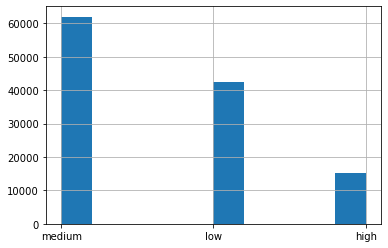

In [329]:
df['cpu_load'].hist()
plt.show()

### After many tests label encoder was found the best for m_id and Ordinal Encoder was best for cpu_load

In [348]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()
df['m_id'] = l1.fit_transform(df['m_id'])

In [324]:
from sklearn.preprocessing import OrdinalEncoder
l = OrdinalEncoder()
df['cpu_load'] = l.fit_transform(df['cpu_load'].values.reshape(-1,1))

In [437]:
X = df.drop('cpu_load', axis='columns')

In [331]:
pd.set_option('display.max_rows', 5)
X.isna().sum()

m_id                    0
syst_direct_ipo_rate    0
                       ..
ewd0_pkts_recvpsec      0
ewd0_pkts_sentpsec      0
Length: 87, dtype: int64

In [325]:
y = df['cpu_load']

## Train Test split was done for hyperparameter tuning but final model was trained in whole dataset

## StandardScaler and MinMax Scaling were done but they increased the logloss hence not included

## Feature Engineering

### Tried 4 methods to decrease number of features - SelectKbest, Y_corr, X_corr, Feature_importance
### All were tried in different orders and different columns but SelectKbest and X_corr worked best

In [334]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Chi2 decreased logloss when 4 lowest scores were removed, removing 5 columns with lowest scores didnt affect accuracy but decreased model fit time

In [438]:
X.shape

(119782, 87)

In [350]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [351]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [352]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['col','Score']

In [340]:
pd.set_option('display.max_rows', None)
featureScores

,col,Score
0,m_id,5.468823e+03
1,syst_direct_ipo_rate,5.357717e+07
2,syst_buffered_ipo_rate,3.513769e+07
3,syst_page_fault_rate,2.221515e+06
4,syst_page_read_ipo_rate,6.603325e+05
5,syst_process_count,1.133408e+05
6,syst_other_states,1.271197e+02
7,page_page_write_ipo_rate,2.255968e+05
8,page_global_valid_fault_rate,6.034174e+05
9,page_free_list_size,2.728862e+08


In [353]:
print(featureScores.nsmallest(5,'Score'))

                col         Score
28  app06_proccount  2.180952e-28
64  app03_proccount  8.723808e-28
24        state_cur  1.900091e-02
69     app02_pgflts  7.534490e-01
51     app01_pgflts  9.224523e-01
45     app08_pgflts  4.570878e+00


In [354]:
removed = [] #keeps track of all removed columns

In [439]:
for i in featureScores.nsmallest(4,'Score')['col']:
    if i in X.columns:
        removed += i
        del X[i]

In [440]:
X.shape

(119782, 83)

In [358]:
len(removed)

75

### Feature Importance was not used in the final model as the same columns were removed by different methods

In [360]:
#from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(n_jobs = -1)
model.fit(X,y)

ExtraTreesClassifier(n_jobs=-1)

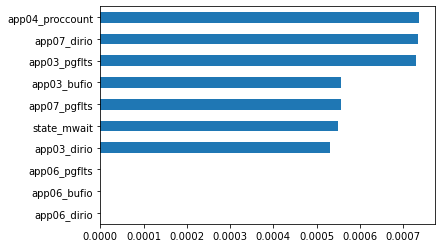

In [361]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nsmallest(10).plot(kind='barh')
plt.show()

In [425]:
for i in feat_importances.nsmallest(7).index.values:
    if i in X.columns:
        removed = removed + [i]
        del X[i]

In [441]:
X.shape

(119782, 83)

### X correlation is correlation between all the features, .8, .85, .875, .9, .92, .94, .95, .97, .975, .98, .985, .99 were used as threshold and final model had .98

## .95 was used that removed 18 columns that had 95% correlation

In [403]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    return col_corr
    #print(dataset)

In [442]:
corr_removed = correlation(X, .95)

In [392]:
removed = removed + list(corr_removed)

In [393]:
len(corr_removed)

18

### Below function was used to remove seperate columns that had more than n unique value for feature binning that was not used in final model

In [370]:
bin_col = []

In [371]:
for col in X:
    if X[col].nunique() > 500:
        bin_col.append(col)

In [372]:
X.shape

(119782, 63)

In [373]:
X.head()

,m_id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_free_list_size,page_modified_list_size,...,tcp_rxdup,tcp_retxpk,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
0,2,38.50,458.07,0.00,0.0,259,22,0.4,170323,60557,...,35,0,0,415.483,479.983,15.367,281.383,245.533,278.767,277.300
1,0,66.43,657.65,0.43,0.0,272,12,23.8,121776,102325,...,0,0,0,526.533,554.550,67.300,438.583,401.633,436.000,366.183
2,5,29.07,322.25,0.00,0.0,171,10,0.0,271435,44159,...,0,0,0,337.967,314.067,0.667,230.333,230.050,220.200,240.333
3,4,1063.13,286.92,4.08,0.0,253,10,0.0,171316,68325,...,0,0,0,336.000,379.833,24.250,249.767,251.300,178.183,139.733
4,5,22.97,369.32,0.00,0.0,165,10,0.0,280388,40128,...,0,0,0,300.833,314.983,0.733,295.583,257.300,274.200,237.250


## Y_corr was to see correlation between features and target, It was not used in the final model

In [30]:
#corr_y =  df.corr()['cpu_load']

In [ ]:
#removed_y_corr = []

In [ ]:
#for i in corr_y:
   # if -.005 <i < .005:
       # removed_y_corr += [corr_y[corr_y == i].index[0]]

In [ ]:
#len(removed_y_corr)
#removed += removed_y_corr

In [374]:
X.head()

,m_id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_free_list_size,page_modified_list_size,...,tcp_rxdup,tcp_retxpk,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
0,2,38.50,458.07,0.00,0.0,259,22,0.4,170323,60557,...,35,0,0,415.483,479.983,15.367,281.383,245.533,278.767,277.300
1,0,66.43,657.65,0.43,0.0,272,12,23.8,121776,102325,...,0,0,0,526.533,554.550,67.300,438.583,401.633,436.000,366.183
2,5,29.07,322.25,0.00,0.0,171,10,0.0,271435,44159,...,0,0,0,337.967,314.067,0.667,230.333,230.050,220.200,240.333
3,4,1063.13,286.92,4.08,0.0,253,10,0.0,171316,68325,...,0,0,0,336.000,379.833,24.250,249.767,251.300,178.183,139.733
4,5,22.97,369.32,0.00,0.0,165,10,0.0,280388,40128,...,0,0,0,300.833,314.983,0.733,295.583,257.300,274.200,237.250


In [375]:
y.head()

0    2.0
1    2.0
2    1.0
3    0.0
4    1.0
Name: cpu_load, dtype: float64

## Feature binning was not done in the final model, tried using all different parameters for encode, strategy and n_bins ranging from 2 - 1000 at different steps and only on the columns where unique values exceeded n_bins 

In [7]:
#from sklearn.preprocessing import KBinsDiscretizer

In [300]:
#est1 = KBinsDiscretizer(n_bins=500, encode='ordinal', strategy='uniform')
#est1.fit(X[bin_col])
#Xt1[bin_col] = est1.transform(X[bin_col])

### Tried PCA for dimesion reduction and got 2 components ~ 72, 28 but logloss increased so dropped

## Different models tried were
### Logistic Classification (l1,l2,none, elastic penalty)
### MLP Classification,
### Random Forest (Third best)
### Naive Bayes
### Adaboost
### GradientBoost (Second Best, Took the longest time)
### Clustering then classification (DBScan, KNN, SVM) using MLP
### One Class SVM then Gradient Boosting
### Final Model - Histogram Gradient Boosting (faster than gradient so hyperparameter tuning was easy) 

In [376]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier

In [41]:
#from sklearn.model_selection import train_test_split

In [43]:
#from sklearn.ensemble import GradientBoostingClassifier

In [151]:
#grd10 = GradientBoostingClassifier(verbose = 1, n_estimators = 200)
#grd10.fit(all_X_train[i], y_train)
#print(grd10.score(all_X_train[i],y_train), end = '') #500
#pred_grd10 = grd10.predict(all_X_test[i])
#print(accuracy_score(y_test,pred_grd10))
#pred_grd10_proba = grd10.predict_proba(all_X_test[i])
#print(log_loss(y_test, pred_grd10_proba)) 

      Iter       Train Loss   Remaining Time 
         1           0.8525            3.82m
         2           0.7657            3.80m
         3           0.6977            3.78m
         4           0.6413            3.82m
         5           0.5947            3.83m
         6           0.5564            3.83m
         7           0.5232            3.82m
         8           0.4953            3.82m
         9           0.4718            3.79m
        10           0.4504            3.77m
        20           0.3427            3.53m
        30           0.2998            3.32m
        40           0.2785            3.11m
        50           0.2674            2.88m
        60           0.2594            2.67m
        70           0.2543            2.48m
        80           0.2506            2.29m
        90           0.2475            2.09m
       100           0.2449            1.90m
       200           0.2307            0.00s
0.90706582591785020.9034951024042742
0.235991642474457

### Below function was used to remove all columns where unique value ==1

In [1]:
one_val = []

In [443]:
for col in X:
    if X[col].nunique() == 1:
        one_val.append(col)

In [444]:
for i in one_val:
    if i in X.columns:
        del X[i]

## Below 2 models had the same logloss and number of features = 57 

In [219]:

hgrd10 = HistGradientBoostingClassifier(verbose = 1,max_iter = 300, max_depth = 30, l2_regularization = 1, early_stopping = False, learning_rate = .05)
hgrd10.fit(X,y)

Binning 0.055 GB of training data: 0.703 s
Fitting gradient boosted rounds:
[1/300] 3 trees, 93 leaves (31 on avg), max depth = 11, in 0.125s
[2/300] 3 trees, 93 leaves (31 on avg), max depth = 11, in 0.123s
[3/300] 3 trees, 93 leaves (31 on avg), max depth = 9, in 0.132s
[4/300] 3 trees, 93 leaves (31 on avg), max depth = 11, in 0.122s
[5/300] 3 trees, 93 leaves (31 on avg), max depth = 11, in 0.116s
[6/300] 3 trees, 93 leaves (31 on avg), max depth = 8, in 0.109s
[7/300] 3 trees, 93 leaves (31 on avg), max depth = 12, in 0.119s
[8/300] 3 trees, 93 leaves (31 on avg), max depth = 11, in 0.112s
[9/300] 3 trees, 93 leaves (31 on avg), max depth = 12, in 0.119s
[10/300] 3 trees, 93 leaves (31 on avg), max depth = 11, in 0.114s
[11/300] 3 trees, 93 leaves (31 on avg), max depth = 10, in 0.113s
[12/300] 3 trees, 93 leaves (31 on avg), max depth = 9, in 0.112s
[13/300] 3 trees, 93 leaves (31 on avg), max depth = 9, in 0.114s
[14/300] 3 trees, 93 leaves (31 on avg), max depth = 10, in 0.114s

HistGradientBoostingClassifier(early_stopping=False, l2_regularization=1,
                               learning_rate=0.05, max_depth=30, max_iter=300,
                               verbose=1)

In [221]:

hgrd12 = HistGradientBoostingClassifier(verbose = 1,max_iter = 330, max_depth = 30, l2_regularization = 1, early_stopping = False, learning_rate = .05)
hgrd12.fit(X,y)

Binning 0.055 GB of training data: 0.630 s
Fitting gradient boosted rounds:
[1/330] 3 trees, 93 leaves (31 on avg), max depth = 11, in 0.113s
[2/330] 3 trees, 93 leaves (31 on avg), max depth = 11, in 0.110s
[3/330] 3 trees, 93 leaves (31 on avg), max depth = 9, in 0.113s
[4/330] 3 trees, 93 leaves (31 on avg), max depth = 11, in 0.111s
[5/330] 3 trees, 93 leaves (31 on avg), max depth = 11, in 0.199s
[6/330] 3 trees, 93 leaves (31 on avg), max depth = 8, in 0.139s
[7/330] 3 trees, 93 leaves (31 on avg), max depth = 12, in 0.125s
[8/330] 3 trees, 93 leaves (31 on avg), max depth = 11, in 0.124s
[9/330] 3 trees, 93 leaves (31 on avg), max depth = 12, in 0.132s
[10/330] 3 trees, 93 leaves (31 on avg), max depth = 11, in 0.123s
[11/330] 3 trees, 93 leaves (31 on avg), max depth = 10, in 0.127s
[12/330] 3 trees, 93 leaves (31 on avg), max depth = 9, in 0.127s
[13/330] 3 trees, 93 leaves (31 on avg), max depth = 9, in 0.141s
[14/330] 3 trees, 93 leaves (31 on avg), max depth = 10, in 0.130s

HistGradientBoostingClassifier(early_stopping=False, l2_regularization=1,
                               learning_rate=0.05, max_depth=30, max_iter=330,
                               verbose=1)

# Hyperparamter testing

### log_loss and accuracy_score not used in final model

In [46]:
#from  sklearn.metrics import accuracy_score
#from  sklearn.metrics import log_loss

In [ ]:
X.shape

In [ ]:
#for i in [1500, 2000, 2250, 2500, 2750, 3250, 3750, 4200, 4600]:
    #est3 = HistGradientBoostingClassifier(max_iter= i)
    #est3.fit(X_train, y_train)
    #print(i, est3.score(X_train,y_train), end = '')
    #pred_est3 = est3.predict(X_test)
    #print(accuracy_score(y_test,pred_est3))

### 63 col .95 only and without m_id'

95 corr X

In [ ]:
#for i in [150, 200, 250, 275, 325, 375, 420, 460, 600, 700, 800, 900, 1200]:
    #est3 = HistGradientBoostingClassifier(max_iter= i)
    #est3.fit(X_train, y_train)
    #print(i, est3.score(X_train,y_train), end = '')
    #pred_est3 = est3.predict(X_test)
    #print(accuracy_score(y_test,pred_est3))

In [ ]:
#for i in [1500, 2000, 2250, 2500, 2750, 3250, 3750, 4200, 4600]:
    #est3 = HistGradientBoostingClassifier(max_iter= i)
    #est3.fit(X_train, y_train)
    #print(i, est3.score(X_train,y_train), end = '')
    #pred_est3 = est3.predict(X_test)
    #print(accuracy_score(y_test,pred_est3))

chi without corr 

In [ ]:
X.shape

In [ ]:
#for i in [150, 200, 250, 275, 325, 375, 420, 460, 600, 700, 800, 900, 1200]:
    #est3 = HistGradientBoostingClassifier(max_iter= i)
    #est3.fit(X_train, y_train)
    #print(i, est3.score(X_train,y_train), end = '')
    #pred_est3 = est3.predict(X_test)
    #print(accuracy_score(y_test,pred_est3))

In [ ]:
#Xchr generally performs better 

X95 & feature 5

In [ ]:
#for i in [150, 200, 250, 275, 325, 375, 420, 460, 600, 700, 800, 900, 1200]:
    #est3 = HistGradientBoostingClassifier(max_iter= i)
    #est3.fit(X_train, y_train)
    #print(i, est3.score(X_train,y_train), end = '')
    #pred_est3 = est3.predict(X_test)
    #print(accuracy_score(y_test,pred_est3))

Testing

In [61]:
df_test = pd.read_csv(r'../input/trial-project/test.csv')

In [ ]:
df_test.shape

In [63]:
X_test_data = df_test.copy(deep = True)

In [64]:
X_test_data.shape

(58998, 88)

In [65]:
X_test_data = X_test_data[X.columns]

In [66]:
X_test_data.head()

,m_id,syst_direct_ipo_rate,syst_buffered_ipo_rate,syst_page_fault_rate,syst_page_read_ipo_rate,syst_process_count,syst_other_states,page_page_write_ipo_rate,page_global_valid_fault_rate,page_free_list_size,...,tcp_rxdup,tcp_retxpk,tcp_kpalv,lla0_pkts_recvpsec,lla0_pkts_sentpsec,llb0_pkts_recvpsec,ewc0_pkts_recvpsec,ewc0_pkts_sentpsec,ewd0_pkts_recvpsec,ewd0_pkts_sentpsec
0,f,30.20,335.77,0.00,0.00,165,10,0.00,0.00,280348,...,0,0,0,410.567,259.683,0.717,229.117,375.250,272.233,201.167
1,a,75.30,665.08,30.33,4.53,271,12,9.83,13.45,135805,...,0,1,0,484.250,516.700,67.817,666.533,554.267,496.233,387.850
2,c,31.02,251.00,0.00,0.00,259,22,0.38,0.00,171796,...,34,0,0,242.300,251.150,15.483,229.800,220.300,315.483,277.767
3,e,38.78,493.92,0.05,0.00,252,10,7.65,0.05,172948,...,0,0,0,394.900,515.850,25.033,302.733,230.600,308.483,273.650
4,b,62.83,379.27,0.00,0.00,318,10,0.27,0.00,88866,...,0,0,0,332.467,290.283,66.050,226.067,331.033,228.017,233.450


In [67]:
from sklearn.preprocessing import LabelEncoder
l11 = LabelEncoder()
X_test_data['m_id'] = l11.fit_transform(X_test_data['m_id'])

In [224]:
probab_grdh12 = hgrd12.predict_proba(X_test_data)

In [222]:
probab_grdh10 = hgrd10.predict_proba(X_test_data)

In [196]:
labels = df_test['id']

In [230]:
trial12 = pd.DataFrame(data = labels,    
                  columns = ['id']) 
trial12['high'] = probab_grdh12[:,:1]
trial12['low'] = probab_grdh12[:,1:2]
trial12['medium'] = probab_grdh12[:,-1:]

In [240]:
trial10 = pd.DataFrame(data = labels,    
                  columns = ['id']) 
trial10['high'] = probab_grdh10[:,:1]
trial10['low'] = probab_grdh10[:,1:2]
trial10['medium'] = probab_grdh10[:,-1:]

In [309]:
trial10 = trial10.reindex(columns=['id','low','medium','high'])

In [ ]:
trial12 = trial12.reindex(columns=['id','low','medium','high'])

In [242]:
trial10.head(10)

,id,low,medium,high
0,0,0.994110,0.005841,0.000050
1,1,0.004143,0.995236,0.000621
2,2,0.999422,0.000530,0.000048
3,3,0.623371,0.375791,0.000838
4,4,0.999112,0.000690,0.000198
5,5,0.000127,0.926413,0.073459
6,6,0.999936,0.000047,0.000017
7,7,0.000188,0.994824,0.004988
8,8,0.000030,0.990290,0.009679
9,9,0.000148,0.990395,0.009457


In [ ]:
trial12.to_csv(r'hgrd12_final.csv', index = False)

In [310]:
trial10.to_csv(r'hgrd10__final.csv', index = False)

## Final models with same log loss both histogram Gradient boosting with parameters as follows -

## hgrd12 - HistGradientBoostingClassifier(verbose = 1,max_iter = 330, max_depth = 30, l2_regularization = 1, early_stopping = False, learning_rate = .05)
## hgrd10 - HistGradientBoostingClassifier(verbose = 1,max_iter = 300, max_depth = 30, l2_regularization = 1, early_stopping = False, learning_rate = .05)